In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [31]:
# Database credentials
db_username = "root"
db_password = "Pa55w0rd"
hostname = "127.0.0.1"
port = 3306
database_name = "task7"
table_name = "sales"

# Step 1: Create connection string
engine = create_engine(f"mysql+pymysql://{db_username}:{db_password}@{hostname}:{port}/{database_name}")

In [35]:
# Step 2: Run SQL query to get data
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, engine)

In [37]:
# Step 3: Print results
print(df)

     product  total_qty    revenue
0  Product_B    15955.0  821389.87
1  Product_A    16030.0  822357.66
2  Product_E    15961.0  842033.16
3  Product_C    15589.0  813531.26
4  Product_D    16736.0  883208.66


<Figure size 1000x700 with 0 Axes>

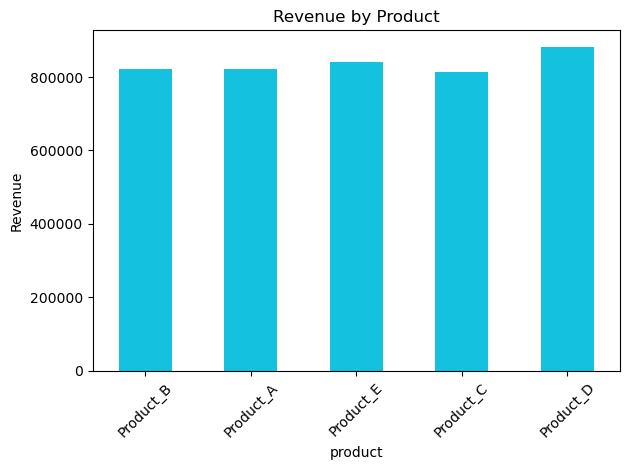

In [39]:
# Step 4: Plot bar chart
plt.figure(figsize=(10, 7))
df.plot(x='product', y='revenue', kind='bar', color='#14c1de', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

## Implementing using function - 1

2025-05-01 22:42:15,589 - INFO - Creating database engine.
2025-05-01 22:42:15,590 - INFO - Executing SQL query to fetch sales summary.
2025-05-01 22:42:15,613 - INFO - Plotting bar chart.



Sales Summary:
      product  total_qty    revenue
0  Product_B    15955.0  821389.87
1  Product_A    16030.0  822357.66
2  Product_E    15961.0  842033.16
3  Product_C    15589.0  813531.26
4  Product_D    16736.0  883208.66


<Figure size 1000x700 with 0 Axes>

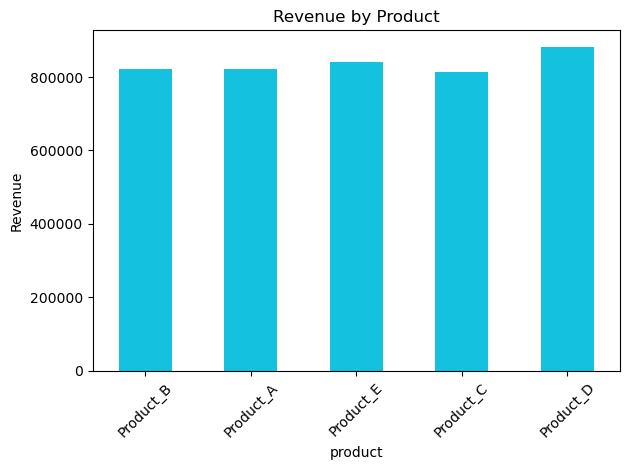

2025-05-01 22:42:15,714 - INFO - Bar chart saved as sales_chart.png


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def get_engine(user, password, host, port, db):
    """
    Create a SQLAlchemy engine for a MySQL database.
    """
    # URL-encode the password to handle special characters
    encoded_password = quote_plus(password)
    connection_string = f"mysql+pymysql://{user}:{encoded_password}@{host}:{port}/{db}"
    logging.info("Creating database engine.")
    return create_engine(connection_string)

def fetch_sales_summary(engine, table):
    """
    Fetch sales summary (total quantity and revenue per product) from the sales table.
    """
    query = f"""
        SELECT product, 
               SUM(quantity) AS total_qty, 
               SUM(quantity * price) AS revenue
        FROM {table}
        GROUP BY product
    """
    logging.info("Executing SQL query to fetch sales summary.")
    return pd.read_sql_query(query, engine)

def plot_revenue_bar_chart(df, output_file="sales_chart.png"):
    """
    Plot a bar chart of revenue by product and save it as a PNG file.
    """
    logging.info("Plotting bar chart.")
    plt.figure(figsize=(10, 7))
    ax = df.plot(
        x='product', y='revenue', kind='bar', color='#14c1de', legend=False
    )
    plt.ylabel("Revenue")
    plt.title("Revenue by Product")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    logging.info(f"Bar chart saved as {output_file}")

def main():
    # Database connection info
    db_username = "root"
    db_password = "Pa55w0rd"  # Use your actual password
    hostname = "127.0.0.1"
    port = 3306
    database_name = "task7"
    table_name = "sales"

    try:
        engine = get_engine(db_username, db_password, hostname, port, database_name)
        df = fetch_sales_summary(engine, table_name)
        print("\nSales Summary:\n", df)
        plot_revenue_bar_chart(df)
    except Exception as e:
        logging.error("An error occurred: %s", e)
        sys.exit(1)

if __name__ == "__main__":
    main()

2025-05-01 22:45:25,240 - INFO - Connected to database: sales_data.db
2025-05-01 22:45:25,241 - INFO - Table already contains 8000 rows. Skipping data insertion.
2025-05-01 22:45:25,242 - INFO - Fetching sales summary from database.
2025-05-01 22:45:25,246 - INFO - Plotting bar chart.



Sales Summary:
      product  total_qty    revenue
0  Product_A      15840  824327.80
1  Product_B      17343  927478.78
2  Product_C      15630  822703.04
3  Product_D      16475  860011.38
4  Product_E      16438  853381.81


<Figure size 1000x700 with 0 Axes>

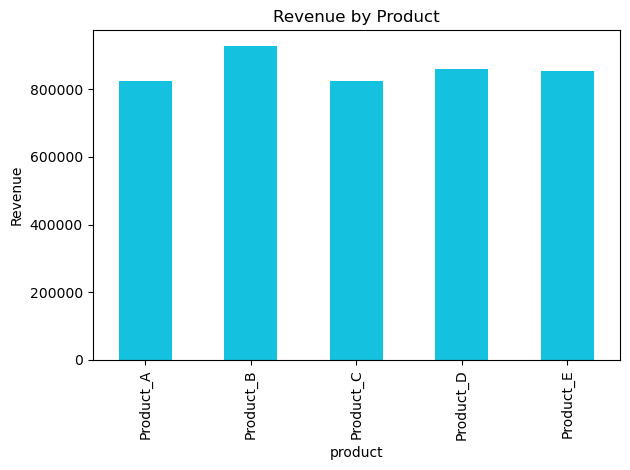

2025-05-01 22:45:25,349 - INFO - Bar chart saved as sales_chart.png
2025-05-01 22:45:25,350 - INFO - Database connection closed.


In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

def connect_db(db_path="sales_data.db"):
    """
    Connect to SQLite database and return connection and cursor.
    """
    try:
        conn = sqlite3.connect(db_path)
        logging.info(f"Connected to database: {db_path}")
        return conn, conn.cursor()
    except Exception as e:
        logging.error(f"Failed to connect to database: {e}")
        sys.exit(1)

def create_table(cursor):
    """
    Create the sales table if it does not exist.
    """
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            product TEXT,
            quantity INTEGER,
            price REAL
        )
    """)

def insert_dummy_data(cursor, conn, n_rows=8000):
    """
    Insert dummy sales data if the table is empty.
    """
    cursor.execute("SELECT COUNT(*) FROM sales")
    count = cursor.fetchone()[0]
    if count == 0:
        logging.info(f"Inserting {n_rows} rows of dummy data.")
        products = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E']
        np.random.seed(42)
        rows = [
            (
                np.random.choice(products),
                int(np.random.randint(1, 20)),
                float(np.round(np.random.uniform(5, 100), 2))
            )
            for _ in range(n_rows)
        ]
        cursor.executemany(
            "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", rows
        )
        conn.commit()
        logging.info("Dummy data inserted.")
    else:
        logging.info(f"Table already contains {count} rows. Skipping data insertion.")

def fetch_sales_summary(conn):
    """
    Fetch sales summary (total quantity and revenue by product) as a DataFrame.
    """
    query = """
        SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
        FROM sales
        GROUP BY product
    """
    logging.info("Fetching sales summary from database.")
    return pd.read_sql_query(query, conn)

def plot_revenue_bar_chart(df, output_file="sales_chart.png"):
    """
    Plot a bar chart of revenue by product and save it as a PNG file.
    """
    logging.info("Plotting bar chart.")
    plt.figure(figsize=(10, 7))
    df.plot(kind='bar', x='product', y='revenue', color='#14c1de', legend=False)
    plt.ylabel("Revenue")
    plt.title("Revenue by Product")
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    logging.info(f"Bar chart saved as {output_file}")

def main():
    db_path = "sales_data.db"
    conn, cursor = connect_db(db_path)
    try:
        create_table(cursor)
        insert_dummy_data(cursor, conn, n_rows=8000)
        df = fetch_sales_summary(conn)
        print("\nSales Summary:\n", df)
        plot_revenue_bar_chart(df)
    except Exception as e:
        logging.error(f"An error occurred: {e}")
    finally:
        conn.close()
        logging.info("Database connection closed.")

if __name__ == "__main__":
    main()